<br><br><br><br>

<CENTER><font size=12px, face = \"times new roman\">Machine Learning</font></CENTER>

<br><br><br><br>

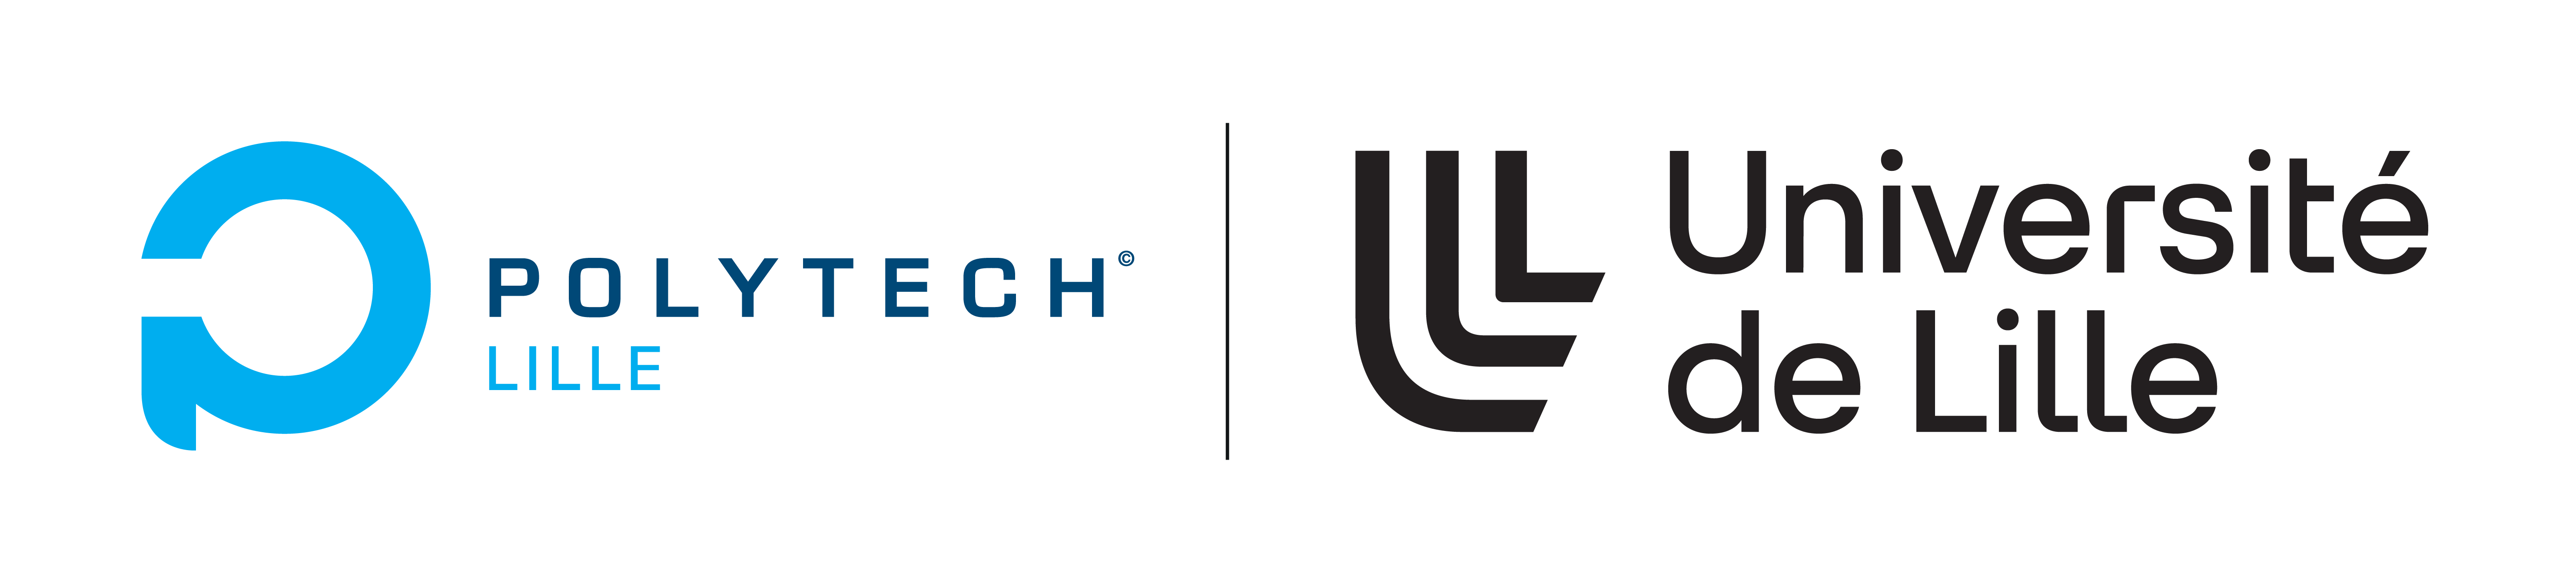

<p><CENTER>Elève:&emsp;MASSON KEVIN <br>Enseignants:&emsp;KESSACI&ensp;ROUSSEL</CENTER></p>

<br><br><br><br>

## TP -- Séance 6

Au cours de cette séance, vous allez utiliser Keras et Tensorflow pour construire des architectures de réseaux de neurones pour classifier des images et utiliser NNI pour trouver des valeurs d'hyper-paramètres efficaces.
Installation des bibliothèques/logiciels nécessaires
Installation TensorFlow
$ pip install --upgrade tensorflow

Installation Keras
$ pip install --upgrade keras

Installation nni
$ python3 -m pip install --upgrade nni
$ echo 'export PATH=${PATH}:${HOME}/.local/bin' >> ~/.bashrc
$ source ~/.bashrc


NNI est une boîte à outils AutoML gratuite et open source développée par Microsoft. Celle-ci permet de facilement utiliser des outils classiques d'hyperparamétrage pour rendre le plus efficace possible les architectures basées sur des réseaux de neurones en particulier. Ici, nous nous intéresserons au jeu de données Fashion-MNIST et à Keras, une bibliothèque opensource écrite en python et permettant d'utiliser des algorithmes d'apprentissage automatique.


NNI propose un tutoriel permettant son utilisation pour la résolution du jeu de données MNIST initial (équivalent au jeu de données digits).

Aide :
- Télécharger les fichiers : config.yml / mnist-keras.py / search_space.json
- dans mnist-keras : remplacer np.float par float

Les commandes nni sont disponibles à l'adresse : https://nni.readthedocs.io/en/latest/reference/nnictl.html
Pour lancer nni, taper dans le terminal : nnictl create --config config.yml
N'oublier pas de stopper la commande une fois le run terminé.


In [31]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras

# Téléchargement du jeu de données Fashion-MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist

**§ Donner une description brève du jeu de données Fashion-MNIST**

Le jeu de données Fashion-MNIST comprend un ensemble d'images du catalogue Zalando. Chaque image comprend 28*28 pixels et appartient à une catégorie de vétêment indiquée par les numéros suivants.<br>
<ul>
    <li>0 T-shirt/top
    <li>1 Trouser
    <li>2 Pullover
    <li>3 Dress
    <li>4 Coat
    <li>5 Sandal
    <li>6 Shirt
    <li>7 Sneaker
    <li>8 Bag
    <li>9 Ankle boot
<ul>

**Affichage des images**

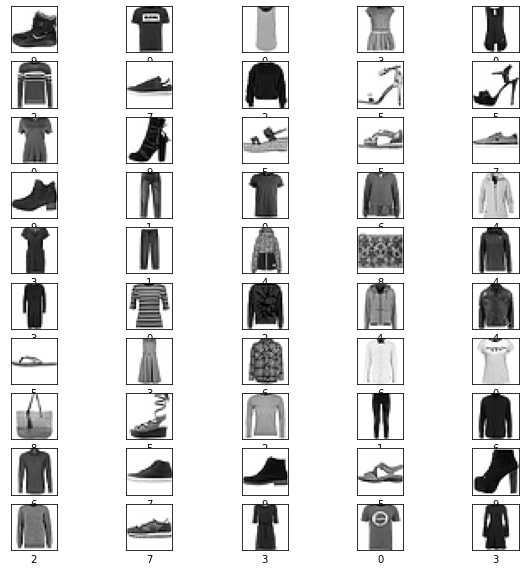

In [45]:
import tensorflow as tf
from tensorflow import keras
# Charger les données Fashion-MNIST
fashion_mnist = keras.datasets.fashion_mnist 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# Afficher les 25 premières images du jeu de données d'apprentissage
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range (50):
    plt. subplot (10,5,i+1)
    plt.xticks ([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images [i], cmap=plt.cm.binary)
    plt.xlabel(train_labels [i])
plt.show()

**§ Exécuter l'exemple du tutoriel**

Fait 


**§ Présenter le réseau de neurones et les hyper-paramètres**

Cette fonction créer un modèle simple de réseau de neurones convolutif pour l'ensemble de données Fashion_MNIST<br>
Pour chaque itération, notre neurone va s'entrainter sur les hypér-paramètres, qui sont : Learning_rate et optimizer, et ensuite va déterminer une valeur d'accuracy de ce jeu d'hyper-paramètre.


**§ Discuter les résultats obtenus**

Pour chaque valeur d'hyper-paramètres on obtient une valeur d'accuracy (métrics) différentes.<br>
Avec pour valeur d'optimizer : Adam, le réseau neurone semble être plus performant.<br>
De plus, on remarque que pour une valeur d'optimizer : "Adam" et un learning_rate vers les 0.002, on a un bon ratio entre le temps d'execution et une bonne valeur d'Accuracy.

**§ Utiliser NNI et Keras pour construire une architecture basée sur les réseaux de neurones pour résoudre le problème de classification pour le jeu de données Fashion-MNIST : décrire l'architecture utilisée les hyperparamètres à instancier, le protocole d'hyperparamétrage et les résultats obtenus**

Pour le jeu de données Fashion-MNIST nous avons modifié le fichier mnist-keras(joins de le dossier zip) de sorte à faire intervenir le jeu de données Fashion-MNIST à la place du jeu de données mnist, nous avons donc modifier les différents appels concernant le jeu de données mnist.<br>
Nous n'avons pas modifier l'architecture des hyperparamètres.<br>
On obtient des résultats meilleurs avec l'hyperparamètres optimizer = "Adam" et des valeurs de learning rate environ égales à 0.002.<br>
Voici, les résultats que l'on obtient : 

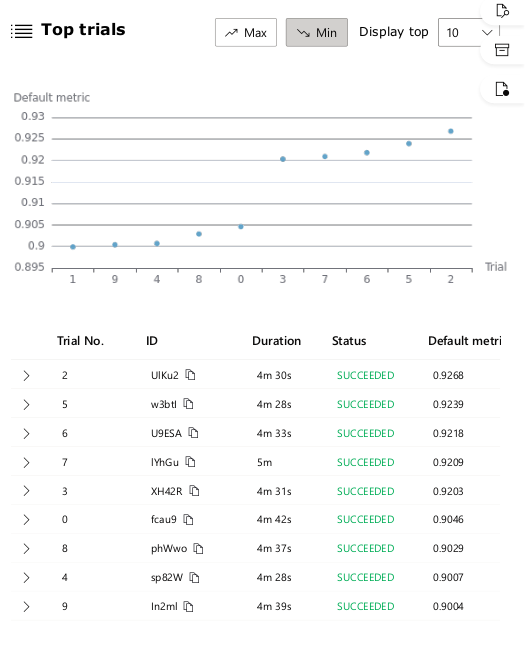

Les 5 Trials avec les plus petites Metrics correspondent aux optimizer = "SGD". Les durées sont équivalentes cependant on obtient des résultats meilleurs pour optimizer = "Adam".
<br> On peut aussi regarder les résultats sur cet autre graphique : 

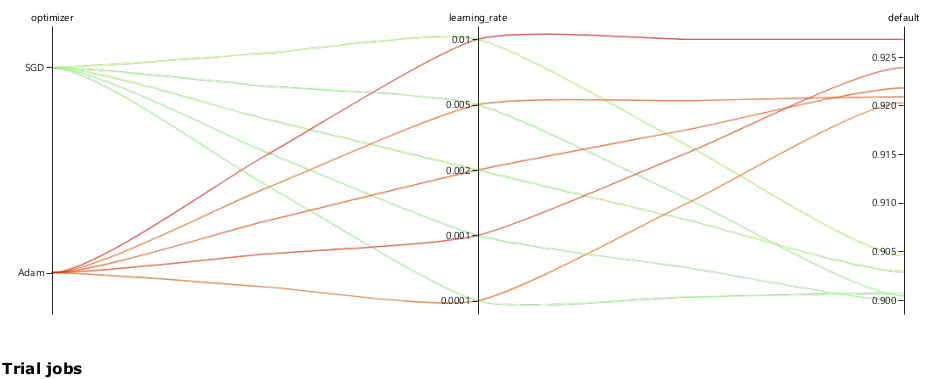

Ce graphique permet d'interpréter les valeurs des différents hyperparamètres dont learning_rate.